<a href="https://colab.research.google.com/github/fuserkuba/HackerRank/blob/master/FraudPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATA

In [2]:
import pandas as pd
import numpy as np
import requests


filename = "https://raw.githubusercontent.com/fuserkuba/ML_Fraud/main/fraud_dataset.csv?token=AC524KOBJ5KZDZIN7WQ5OVTA7XNO4"

df = pd.read_csv(filename, thousands=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       16880 non-null  int64  
 1   B       16880 non-null  int64  
 2   C       13683 non-null  float64
 3   D       16880 non-null  int64  
 4   E       16880 non-null  int64  
 5   F       16880 non-null  float64
 6   G       16880 non-null  float64
 7   H       16880 non-null  int64  
 8   I       16880 non-null  int64  
 9   J       16880 non-null  object 
 10  K       4016 non-null   float64
 11  L       16880 non-null  int64  
 12  M       16880 non-null  int64  
 13  N       16880 non-null  int64  
 14  O       16880 non-null  int64  
 15  P       16880 non-null  int64  
 16  Q       16880 non-null  float64
 17  R       16880 non-null  float64
 18  S       16880 non-null  float64
 19  Monto   16880 non-null  float64
 20  Fraude  16880 non-null  int64  
dtypes: float64(8), int64(12), object(1)

## FEATURE ENGINEERING

In [6]:
from collections import Counter

display(df.head())
# display(df.info())
print("Dataset: {}".format(df.shape))
print('Dataset classes %s' % Counter(df.Fraude))

# Eliminando filas con valores nulos en la columna C
df_ready = df[df.C.notna()]

print("\nFiltered dataset: {}".format(df_ready.shape))
print('Filtered dataset classes %s' % Counter(df_ready.Fraude))
display(df_ready.head())

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.0,0.0,0,0,UY,0.80,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.0,0.0,0,0,UY,NaN,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.0,0.0,0,1,UY,NaN,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.0,0.0,0,0,UY,0.91,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.0,0.0,0,0,UY,NaN,0,1,1,0,1,0.0,0.0,25.96,135.40,1


Dataset: (16880, 21)
Dataset classes Counter({0: 12269, 1: 4611})

Filtered dataset: (13683, 21)
Filtered dataset classes Counter({0: 9625, 1: 4058})


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.0,0.0,0,0,UY,0.80,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.0,0.0,0,0,UY,NaN,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.0,0.0,0,1,UY,NaN,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.0,0.0,0,0,UY,0.91,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.0,0.0,0,0,UY,NaN,0,1,1,0,1,0.0,0.0,25.96,135.40,1


In [126]:
from sklearn.preprocessing import OrdinalEncoder

target = ['Fraude']
features = df_ready.columns.to_list()
features.remove('Fraude')
# Eliminando K por ser nulo en la mayoría de los ejemplos
features.remove('K')
# Encoding de J por ser categórico
features.remove('J')
enc = OrdinalEncoder()
J_encoded = enc.fit_transform(df_ready[['J']].values)

X = np.concatenate((df_ready[features].values,J_encoded),axis=1)
y = df_ready[target].values.ravel()

display(X[:5],X.shape)
display(y[:5],y.shape)

array([[0.0000e+00, 1.0000e+01, 5.0257e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 7.2500e+00, 3.7510e+01, 1.8000e+01],
       [0.0000e+00, 1.0000e+01, 2.9014e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.1660e+01, 8.1800e+00, 1.8000e+01],
       [0.0000e+00, 7.0000e+00, 9.2000e+01, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 8.6970e+01, 1.3960e+01, 1.8000e+01],
       [9.0000e+00, 1.6000e+01, 5.0269e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00,
        0.000

(13683, 19)

array([1, 1, 1, 1, 1])

(13683,)

# TRAINING

## PREPARE TRAIN AND TEST DATA

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

print("Training set X: {}  y: {}".format(X_train.shape,y_train.shape))
print("Test set X: {}  y: {}".format(X_test.shape,y_test.shape))

print('Training dataset shape %s' % Counter(y_train))
print('Test dataset shape %s' % Counter(y_test))

Training set X: (9578, 19)  y: (9578,)
Test set X: (4105, 19)  y: (4105,)
Training dataset shape Counter({0: 6737, 1: 2841})
Test dataset shape Counter({0: 2888, 1: 1217})


### RESAMPLING

In [128]:
from imblearn.combine import SMOTEENN # Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.
from imblearn.over_sampling import SMOTE # Class to perform over-sampling using SMOTE.
from imblearn.under_sampling import RandomUnderSampler # Under-sample the majority class(es) by randomly picking samples with or without replacement.
from imblearn.pipeline import Pipeline


#sme = SMOTEENN(random_state=42)
# define pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_res, y_res = pipeline.fit_resample(X_train, y_train)

print('Trained dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

Trained dataset shape Counter({0: 6737, 1: 2841})
Resampled dataset shape Counter({0: 4210, 1: 3368})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## PREPARE TRAINING

In [129]:
from sklearn.preprocessing import StandardScaler
#
from sklearn.pipeline import Pipeline
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

#classifier = KNeighborsClassifier(n_neighbors=3)
#classifier = RandomForestClassifier(n_jobs=-1)
#classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
classifier = GradientBoostingClassifier()

parameters = {
'clf__learning_rate': [0.15, 0.2],
'clf__n_estimators': [100, 200, 300],
'clf__max_depth': [6, 8, 10],
'clf__max_features': [2, 4],
'clf__min_samples_leaf': [18, 19, 20],
'clf__loss':['deviance', 'exponential']
}


steps = [('scaler', StandardScaler()),
         ('clf', classifier)]

pipeline = Pipeline(steps)

# parameters = {'clf__n_neighbors': (3,5,10)}
parameters_RandomForestClassifier = {
'clf__criterion': ['entropy'],
'clf__max_depth': [200, 250, 300],
'clf__max_features': [2, 4],
'clf__min_samples_leaf': [2, 6],
'clf__min_samples_split': [2, 6],
'clf__n_estimators': [100, 200, 300],
'clf__class_weight': ['balanced_subsample']
}
parameters_XGBClassifier = {
'clf__learning_rate': [0.05,0.1, 0.3],
'clf__n_estimators': [250, 300, 350],
'clf__subsample': [ 0.5, 0.9],
'clf__colsample_bytree': [0.5, 0.9],
'clf__max_depth': [8, 10, 12]
 }

display(parameters)


{'clf__learning_rate': [0.15, 0.2],
 'clf__loss': ['deviance', 'exponential'],
 'clf__max_depth': [6, 8, 10],
 'clf__max_features': [2, 4],
 'clf__min_samples_leaf': [18, 19, 20],
 'clf__n_estimators': [100, 200, 300]}

## CROSS VALIDATION

In [130]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from time import time

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='recall')

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
t0 = time()
grid_search.fit(X_train, y_train)
print("Done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

model=grid_search.best_estimator_

print("\nBEST MODEL :")
display(model)

print("BEST SCORE : {}".format(grid_search.best_score_))

Performing grid search...
pipeline: ['scaler', 'clf']
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 20.8min finished


Done in 1253.946s

Best score: 0.675
Best parameters set:
	clf__learning_rate: 0.2
	clf__loss: 'exponential'
	clf__max_depth: 10
	clf__max_features: 4
	clf__min_samples_leaf: 18
	clf__n_estimators: 300

BEST MODEL :


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.2,
                                            loss='exponential', max_depth=10,
                                            max_features=4, max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=18,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=300,
                                            n_iter_no_change=None,
                

BEST SCORE : 0.6746090184787545


## TEST MODEL

'confusion matrix:'

[[2341  547]
 [ 477  740]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2888
           1       0.57      0.61      0.59      1217

    accuracy                           0.75      4105
   macro avg       0.70      0.71      0.71      4105
weighted avg       0.75      0.75      0.75      4105

Recall score: 0.75
F1 score: 0.75
Balanced accuracy score: 0.71
Accuracy: 0.75


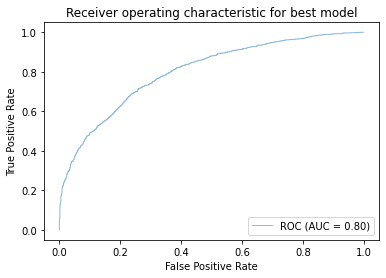

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)

display("confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Recall score: %0.2f" % recall_score(y_test, y_pred, average='weighted'))
print("F1 score: %0.2f" % f1_score(y_test, y_pred, average='weighted'))
#The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
print("Balanced accuracy score: %0.2f" % balanced_accuracy_score(y_test, y_pred))
print("Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
#print("ROC_AUC: %0.2f" % roc_auc_score(y_test, y_pred))

fig, ax = plt.subplots()
viz = plot_roc_curve(model, X_test, y_test,name='ROC',alpha=0.5, lw=1, ax=ax)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for best model")
ax.legend(loc="lower right")
plt.show()

# SAVE MODEL

In [132]:
import joblib

filename='model.joblib'

joblib.dump(model, filename)

['model.joblib']